In [ ]:
#import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



In [ ]:
base_dir = "/content/drive/MyDrive/Project/terrain dataset"       #You can mount the Drive for DataSet or upolad custom Dataset
grass_dir = os.path.join(base_dir, "Grassy_Terrain")
marshy_dir = os.path.join(base_dir, "Marshy_Terrain")
rocky_dir = os.path.join(base_dir, "Rocky_Terrain")
sandy_dir = os.path.join(base_dir, "Sandy_Terrain")
other_dir = os.path.join(base_dir, "Other_Image")

In [ ]:
def load_and_preprocess_image(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

In [ ]:
grass_images, grass_labels = load_and_preprocess_image(grass_dir, "Grassy_Terrain")
marshy_images, marshy_labels = load_and_preprocess_image(marshy_dir, "Marshy_Terrain")
rocky_images, rocky_labels = load_and_preprocess_image(rocky_dir, "Rocky_Terrain")
sandy_images, sandy_labels = load_and_preprocess_image(sandy_dir, "Sandy_Terrain")
other_images, other_labels = load_and_preprocess_image(other_dir, "Other_Image")

In [ ]:
all_images = np.concatenate([grass_images, marshy_images, rocky_images, sandy_images, other_images], axis=0)
all_labels = np.concatenate([grass_labels, marshy_labels, rocky_labels, sandy_labels, other_labels], axis=0)

In [ ]:
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels_encoded, test_size=0.2, random_state=42)

In [ ]:
input_tensor = layers.Input(shape=(224, 224, 3))
base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(5, activation='softmax')(x)

final_model = models.Model(inputs=base_model.input, outputs=output)

In [ ]:
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = final_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 482ms/step - accuracy: 0.6752 - loss: 0.8290 - val_accuracy: 0.9020 - val_loss: 0.2953
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.9046 - loss: 0.3092 - val_accuracy: 0.9322 - val_loss: 0.2020
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.9274 - loss: 0.1983 - val_accuracy: 0.9422 - val_loss: 0.1993
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9559 - loss: 0.1527 - val_accuracy: 0.9322 - val_loss: 0.1982
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.9445 - loss: 0.1683 - val_accuracy: 0.9472 - val_loss: 0.1776
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.9655 - loss: 0.1172 - val_accuracy: 0.9121 - val_loss: 0.2537
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9582 - loss: 0.1276 - val_accuracy: 0.9447 - val_loss: 0.1798
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9710 - loss: 0.0830 - val_accuracy: 0.9397 -

In [ ]:
final_model.save('/content/drive/MyDrive/SaveModel/terrain.h5')

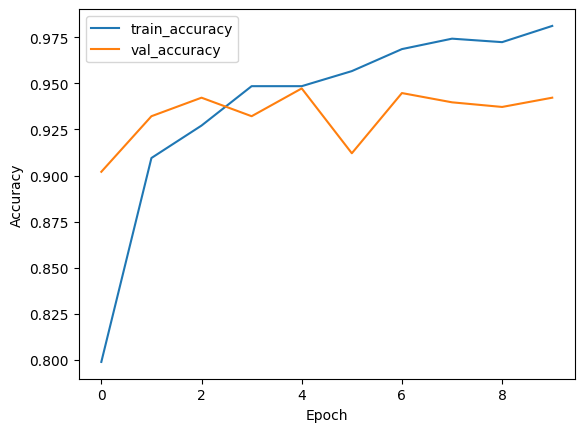

In [ ]:

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step


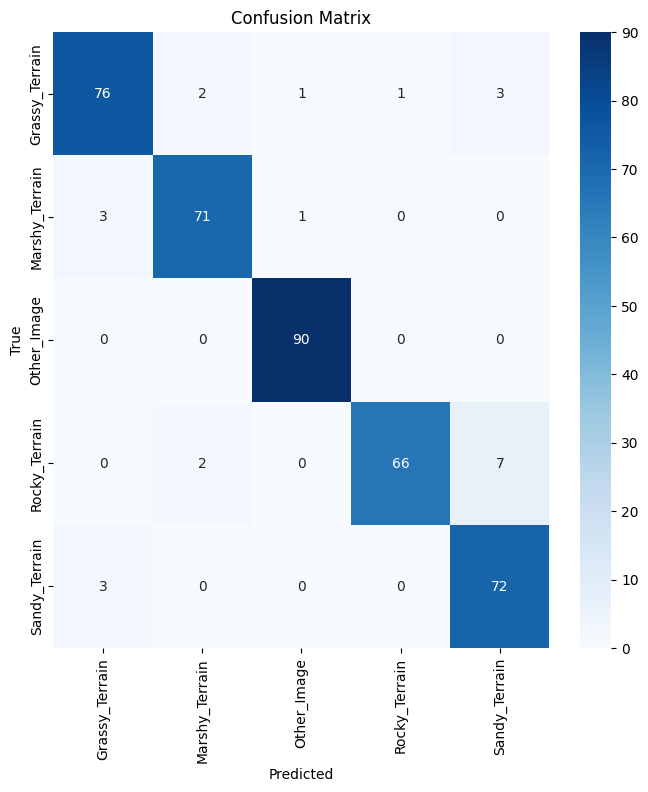

                precision    recall  f1-score   support

Grassy_Terrain       0.93      0.92      0.92        83
Marshy_Terrain       0.95      0.95      0.95        75
   Other_Image       0.98      1.00      0.99        90
 Rocky_Terrain       0.99      0.88      0.93        75
 Sandy_Terrain       0.88      0.96      0.92        75

      accuracy                           0.94       398
     macro avg       0.94      0.94      0.94       398
  weighted avg       0.94      0.94      0.94       398



In [ ]:



y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

class_names = label_encoder.classes_
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=class_names))


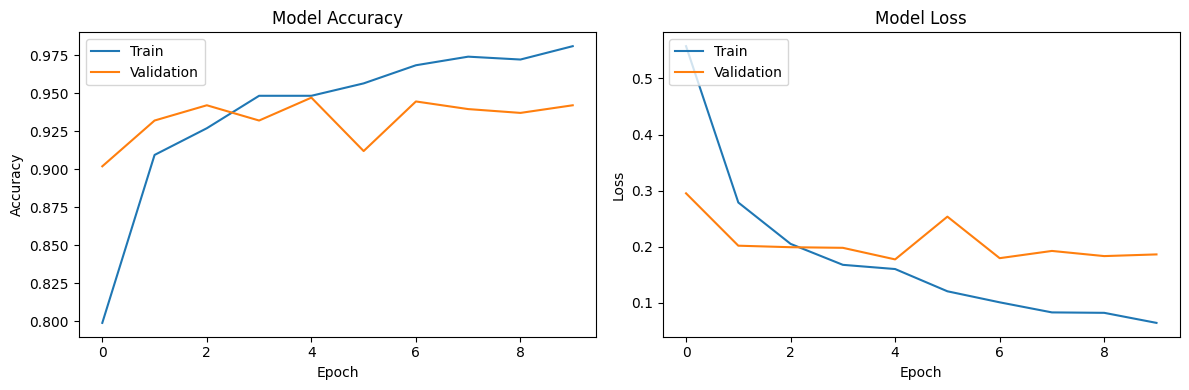

In [ ]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:


training_class_labels = ['Grassy_Terrain', 'Marshy_Terrain', 'Rocky_Terrain', 'Sandy_Terrain', 'Other_Image']

class_labels = ['Grassy_Terrain', 'Marshy_Terrain', 'Other_Image', 'Rocky_Terrain', 'Sandy_Terrain']

model = load_model('/content/drive/MyDrive/Save Model/terrain.h5')

img_path = os.path.join(other_dir,"Other_image (503).jpg")
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

print("Shape of predictions array:", predictions.shape)
print("Predictions array:", predictions)

predicted_class_index = np.argmax(predictions)

print("Predicted class index:", predicted_class_index)

if 0 <= predicted_class_index < len(class_labels):
    predicted_class = class_labels[predicted_class_index]
    print("Predicted class:", predicted_class)
else:
    print("Error: Predicted class index is outside the valid range.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Shape of predictions array: (1, 5)
Predictions array: [[6.9772675e-08 3.0591361e-06 9.9999630e-01 2.4298538e-07 3.2249329e-07]]
Predicted class index: 2
Predicted class: Other_Image


In [ ]:

grass_dir = os.path.join(base_dir, "Grassy_Terrain")
marshy_dir = os.path.join(base_dir, "Marshy_Terrain")
rocky_dir = os.path.join(base_dir, "Rocky_Terrain")
sandy_dir = os.path.join(base_dir, "Sandy_Terrain")
other_dir = os.path.join(base_dir, "Other_Image")

def count_files_in_directory(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

print("Number of images in Grassy_Terrain:", count_files_in_directory(grass_dir))
print("Number of images in Marshy_Terrain:", count_files_in_directory(marshy_dir))
print("Number of images in Rocky_Terrain:", count_files_in_directory(rocky_dir))
print("Number of images in Sandy_Terrain:", count_files_in_directory(sandy_dir))
print("Number of images in Other_Image:", count_files_in_directory(other_dir))


Number of images in Grassy_Terrain: 395
Number of images in Marshy_Terrain: 394
Number of images in Rocky_Terrain: 400
Number of images in Sandy_Terrain: 400
Number of images in Other_Image: 400
